In [22]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
import cvxpy as cp
from matplotlib.colors import ListedColormap
from sklearn import datasets

# Generate a toy dataset
dim = 100
sample= 20
rng = np.random.RandomState(1)
observed = rng.uniform(low=-1, high=1, size=(sample,dim))
# print(observed)
labels = np.repeat([-1, 1], int((sample + 1) / 2))[:sample, None]  # drop last one if necessary
inputs = observed * labels
# print(labels)
X= observed
y= labels
# Construct the problem.
n_features_list = np.arange(sample, dim+1, 2)

distancesa = np.zeros(n_features_list.shape[0])


for i in range(50):
    distances= []
    print(i)
    for n_features in n_features_list:
        x = X[:, :n_features]
        #x_test = X_test[:, :n_features]
#         if n_features%100 ==0:
#             print(n_features)
        n = x.shape[1]
        s_LR = cp.Variable((n, 1))
        objective1 = cp.Minimize(cp.norm(s_LR))
        constraints1 = [y == x @ s_LR]
        prob1 = cp.Problem(objective1, constraints1)
        prob1.solve()
        s_LR_value = s_LR.value
        w_l = s_LR_value
        #print(w_l)
        s_s = cp.Variable((n, 1))
        objective = cp.Minimize(cp.norm(s_s) ** 2)
        constraints = [cp.multiply(y, x @ s_s) >= 1]
        prob = cp.Problem(objective, constraints)
        result = prob.solve()
        s_s_value = s_s.value
        w_s = s_s_value
        #print(w_s)
    
        distance = np.linalg.norm(w_s-w_l)
        distances .append(distance)
    distancesa = distancesa+np.array(distances)
    

# print("The first 10 coefficients of Hard margin SVM:")
# print(w_l.ravel()[0:10])
# print("The first 10 coefficients of minimum L2 norm:")
# print(w_s.ravel()[0:10])
# print("The distance:")
# print(distance)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


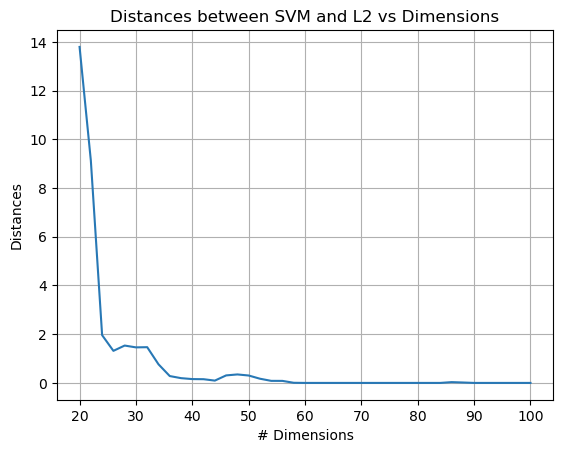

In [24]:
plt.plot(n_features_list, distancesa/40,c='#2878B5')
plt.xlabel("# Dimensions")
plt.ylabel("Distances")
plt.title("Distances between SVM and L2 vs Dimensions")
plt.grid()

plt.savefig('SVM_L2_Iterations.jpg', dpi=300)
plt.show()

In [ ]:

plt.plot(np.arange(0,100000,k),distances2,c='#2878B5')
plt.xlabel("# Iterations")
plt.ylabel("Distances")
plt.title("Distances between SL and L2 vs Iterations")

# plt.legend()
plt.grid()
# plt.xscale('log')
plt.savefig('SL_L2_Iterations.jpg', dpi=300)
plt.show()
# print(distances2)